In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

# plt.rcParams['axes.grid'] = True
# plt.rcParams['axes.grid.which'] = 'both'
plt.style.use('singlecolumn')

def gsm_fidelity(data):
    '''return ground state manifold fidelity'''
    if round(data['J']/data['B'], 2) > 1:
        return np.sum(data['eigoccs'][:2])
    else:
        return data['eigoccs'][0] 

# Loading and checking data

## Cooling

In [2]:
data_dir = "../data/TFIM/logsweep/WF/cooling/"

files = sorted(os.listdir(data_dir))

cooling_data = []
for file in files:
    if not file.endswith('.json'): continue
    cooling_data.append(json.load(open(data_dir+file, 'r')))

## Reheating

In [3]:
data_dir = "../data/TFIM/logsweep/WF/reheating/"

files = sorted(os.listdir(data_dir))

reheating_data = []
for file in files:
    if not file.endswith('.json'): continue
    reheating_data.append(json.load(open(data_dir+file, 'r')))

## Iterative

In [4]:
data_dir = "../data/TFIM/logsweep/WF/iterative/"

files = sorted(os.listdir(data_dir))

iterative_data = []
for file in files:
    if not file.endswith('.json'): continue
    iterative_data.append(json.load(open(data_dir+file, 'r')))

### WF norm check

In [21]:
for d in iterative_data:
    deviations = np.abs(1-np.array(d['norm_check_samples']))
    print(round(np.log10(np.max(deviations)),2), 
          round(np.log10(np.mean(deviations)),2), 
          round(np.log10(np.median(deviations)),2))

-2.73 -2.78 -2.78
-2.46 -2.47 -2.47
-2.4 -2.42 -2.42
-3.01 -3.04 -3.04
-2.79 -2.87 -2.87
-2.68 -2.72 -2.73
-2.21 -2.22 -2.22
-1.44 -1.44 -1.44
-2.53 -2.54 -2.54
-2.91 -3.14 -3.14
-2.76 -2.81 -2.81
-2.29 -2.29 -2.29
-2.98 -3.06 -3.06
-2.36 -2.4 -2.4
-3.36 -3.46 -3.47
-1.73 -1.73 -1.73
-1.96 -1.97 -1.97
-2.99 -3.09 -3.09
-2.62 -2.68 -2.68
-3.11 -3.23 -3.22
-3.7 -3.75 -3.75
-4.49 -4.57 -4.57
-4.08 -4.18 -4.18
-4.82 -4.98 -5.0
-3.17 -3.18 -3.19
-3.8 -3.81 -3.81
-3.36 -3.38 -3.38
-3.79 -3.81 -3.81
-4.5 -4.96 -4.96
-4.49 -4.58 -4.58
-4.25 -4.48 -4.48
-4.17 -4.21 -4.21
-3.4 -3.43 -3.43
-4.26 -4.36 -4.36
-3.22 -3.25 -3.25
-3.87 -3.89 -3.89
-3.66 -3.73 -3.73
-4.61 -4.92 -4.94
-2.85 -2.86 -2.86
-3.58 -3.59 -3.59
-2.89 -2.91 -2.91
-3.16 -3.17 -3.17
-3.22 -3.25 -3.25
-3.92 -3.98 -3.98
-2.65 -2.67 -2.67
-4.05 -4.32 -4.33
-2.7 -2.71 -2.71
-3.72 -3.77 -3.77
-2.82 -2.85 -2.85
-3.24 -3.25 -3.25
-2.52 -2.54 -2.54
-2.85 -2.88 -2.88
-2.46 -2.47 -2.48
-2.94 -2.95 -2.95
-3.16 -3.23 -3.24
-3.31 -3.34 -3.34
-

## Available data summary 

In [22]:
print(' K , L, J/B ')
avail_cooling = [(d['K'], d['L'], round(d['J']/d['B'],1)) for d in cooling_data]
avail_reheating = [(d['K'], d['L'], round(d['J']/d['B'],1)) for d in reheating_data]
avail_iterative = [(d['K'], d['L'], round(d['J']/d['B'],1)) for d in iterative_data]

from itertools import product
for K, L, JvB in np.unique(avail_cooling + avail_reheating + avail_iterative, 
                           axis=0):
    K = int(K)
    L = int(L)
    #if K!=10: continue
    print((K, L, JvB), 
          'C' if (K, L, JvB) in avail_cooling else ' ',
          'R' if (K, L, JvB) in avail_reheating else ' ',
          'It' if (K, L, JvB) in avail_iterative else '  ',
    )

 K , L, J/B 
(2, 2, 0.2) C R   
(2, 2, 1.0) C R   
(2, 2, 5.0) C R   
(2, 3, 0.2) C R   
(2, 3, 1.0) C R   
(2, 3, 5.0) C R   
(2, 4, 0.2) C R   
(2, 4, 1.0) C R   
(2, 4, 5.0) C R   
(2, 5, 0.2) C R   
(2, 5, 1.0) C R   
(2, 5, 5.0) C R   
(2, 6, 0.2) C R   
(2, 6, 1.0) C R   
(2, 6, 5.0) C R   
(2, 7, 0.2) C R   
(2, 7, 1.0) C R   
(2, 7, 5.0) C R   
(2, 8, 0.2) C R   
(2, 8, 1.0) C R   
(2, 8, 5.0) C R   
(2, 9, 0.2) C R   
(2, 9, 1.0) C R   
(2, 9, 5.0) C R   
(2, 10, 0.2) C R   
(2, 10, 1.0) C R   
(2, 10, 5.0) C R   
(2, 11, 0.2) C R   
(2, 11, 1.0) C R   
(2, 11, 5.0) C R   
(2, 12, 0.2) C R   
(2, 12, 1.0) C R   
(2, 12, 5.0) C R   
(2, 13, 0.2) C R   
(2, 13, 1.0) C R   
(2, 13, 5.0) C R   
(2, 14, 0.2) C R   
(2, 14, 1.0) C R   
(2, 14, 5.0) C R   
(3, 2, 0.2) C R   
(3, 2, 1.0) C R   
(3, 2, 5.0) C R   
(3, 3, 0.2) C R   
(3, 3, 1.0) C R   
(3, 3, 5.0) C R   
(3, 4, 0.2) C R   
(3, 4, 1.0) C R   
(3, 4, 5.0) C R   
(3, 5, 0.2) C R   
(3, 5, 1.0) C R   
(3, 5, 5.0) C R   
(3,

# Scaling with system size L

## energy

Text(0, 0.5, 'energy')

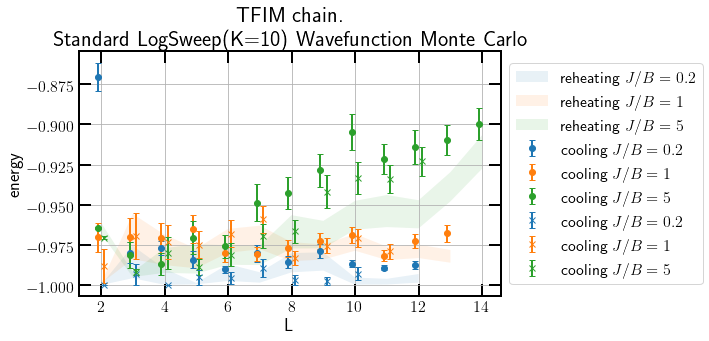

In [31]:
K=10
plt.figure(figsize = (10, 5))
plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

# cooling
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'], 
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples']))
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(np.array(L_l)-0.1, avgs, yerr=stds, 
                 fmt='o', label=f'cooling $J/B={JvB}$')
    
# reheating
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.fill_between(L_l, np.array(avgs)-stds, np.array(avgs)+stds, alpha=.1, 
                     label = f'reheating $J/B={JvB}$')
    
# iterative
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in iterative_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(np.array(L_l)+0.1, avgs, yerr=stds, 
                 fmt='x', label=f'cooling $J/B={JvB}$')
    
plt.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.xlabel('L')
plt.ylabel('energy')

### without cooling

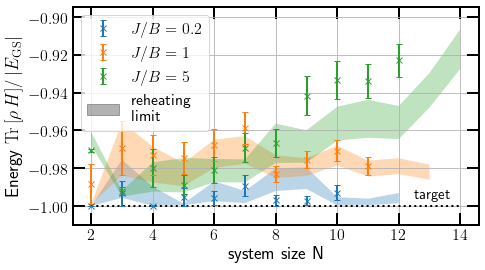

In [29]:
#plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

plt.figure(figsize=[7.0, 4.0])
K=10
JvBlist = [.2, 1, 5]
alpha = 0.3

# cooling
plt.gca().set_prop_cycle(None)
for JvB in JvBlist:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in iterative_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, avgs, yerr=stds, fmt='x', label=f'cooling $J/B={JvB}$')
    
# reheating
plt.gca().set_prop_cycle(None)
for JvB in JvBlist:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    #plt.plot(L_l, avgs, ':', label=f'reheating $J/B={JvB}$')
    #plt.errorbar(L_l, avgs, yerr=stds, fmt=':', label=f'reheating $J/B={JvB}$')
    plt.fill_between(L_l, np.array(avgs)-stds, np.array(avgs)+stds, alpha=alpha, 
                     label = f'reheating $J/B={JvB}$')
    
plt.ylim(-1.01, -.895)
plt.hlines(-1, 2, 14, ls=':')
plt.annotate('target', (12.5, -0.996),
             #bbox = dict(boxstyle='round', facecolor='white', alpha=0.5, zorder=0)
            )
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[3:] + [plt.Polygon([(0,0), (1,1)], color='black', alpha = alpha)],
           [f'$J/B = {JvB}$' for JvB in JvBlist] + ['reheating\nlimit'])
plt.xlabel('system size N')
plt.ylabel(r'Energy $\mathrm{Tr}\left[\rho\,H]\right/\vert E_\mathrm{GS}\vert$')
plt.tight_layout()

#plt.savefig('../figures/LSscaling.pdf', bbox_inches='tight')

### only cooling

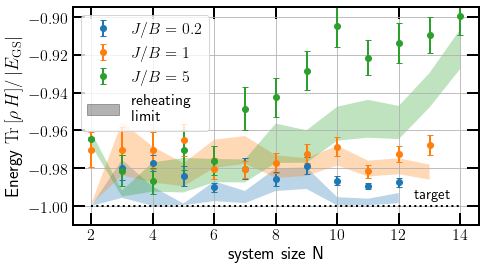

In [24]:
#plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

plt.figure(figsize=[7.0, 4.0])
K=10
JvBlist = [.2, 1, 5]
alpha = 0.3

# cooling
plt.gca().set_prop_cycle(None)
for JvB in JvBlist:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, avgs, yerr=stds, fmt='o', label=f'cooling $J/B={JvB}$')
    
# reheating
plt.gca().set_prop_cycle(None)
for JvB in JvBlist:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    #plt.plot(L_l, avgs, ':', label=f'reheating $J/B={JvB}$')
    #plt.errorbar(L_l, avgs, yerr=stds, fmt=':', label=f'reheating $J/B={JvB}$')
    plt.fill_between(L_l, np.array(avgs)-stds, np.array(avgs)+stds, alpha=alpha, 
                     label = f'reheating $J/B={JvB}$')
    
plt.ylim(-1.01, -.895)
plt.hlines(-1, 2, 14, ls=':')
plt.annotate('target', (12.5, -0.996),
             #bbox = dict(boxstyle='round', facecolor='white', alpha=0.5, zorder=0)
            )
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[3:] + [plt.Polygon([(0,0), (1,1)], color='black', alpha = alpha)],
           [f'$J/B = {JvB}$' for JvB in JvBlist] + ['reheating\nlimit'])
plt.xlabel('system size N')
plt.ylabel(r'Energy $\mathrm{Tr}\left[\rho\,H]\right/\vert E_\mathrm{GS}\vert$')
plt.tight_layout()

#plt.savefig('../figures/LSscaling.pdf', bbox_inches='tight')

## Energy samples vs averages

### reheating 

Text(0, 0.5, 'energy')

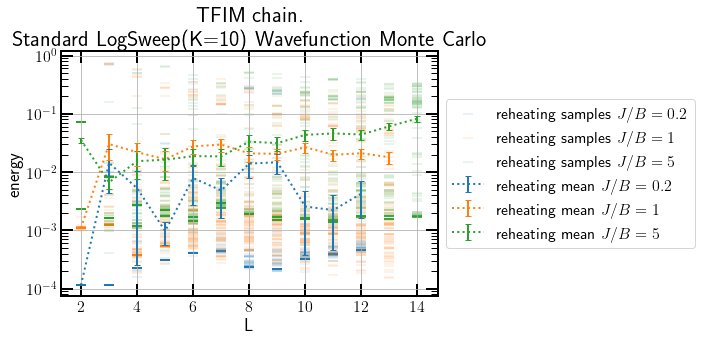

In [9]:
K=10
plt.figure(figsize = (10, 5))
plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

# reheating
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    avgs = np.array(avgs) + 1
#     plt.plot(L_l, avgs, ':', label=f'reheating $J/B={JvB}$')
    plt.errorbar(L_l, avgs, yerr=stds, fmt=':', label=f'reheating mean $J/B={JvB}$')
#     plt.fill_between(L_l, np.array(avgs)-stds, np.array(avgs)+stds, alpha=.1, 
#                      label = f'reheating $J/B={JvB}$')

# reheating
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_samples']
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, samples = zip(*sorted(data_iterator))
    samples = np.array(samples) + 1
    plt.scatter(np.repeat(L_l, samples.shape[-1]), samples.flatten(), 
                s = 100, alpha = 0.1, marker = '_', label=f'reheating samples $J/B={JvB}$')
    
plt.grid(axis='y',which='minor')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.xlabel('L')
plt.ylabel('energy')

### cooling 

Text(0, 0.5, 'energy')

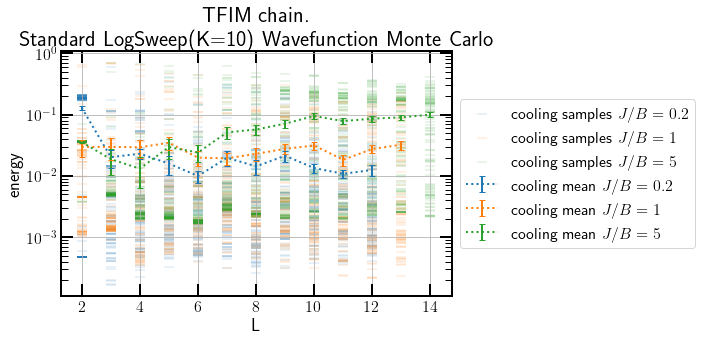

In [10]:
K=10
plt.figure(figsize = (10, 5))
plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

# cooling
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    avgs = np.array(avgs) + 1
#     plt.plot(L_l, avgs, ':', label=f'cooling $J/B={JvB}$')
    plt.errorbar(L_l, avgs, yerr=stds, fmt=':', label=f'cooling mean $J/B={JvB}$')
#     plt.fill_between(L_l, np.array(avgs)-stds, np.array(avgs)+stds, alpha=.1, 
#                      label = f'cooling $J/B={JvB}$')

# cooling
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_samples']
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, samples = zip(*sorted(data_iterator))
    samples = np.array(samples) + 1
    plt.scatter(np.repeat(L_l, samples.shape[-1]), samples.flatten(), 
                s = 100, alpha = 0.1, marker = '_', label=f'cooling samples $J/B={JvB}$')
    
plt.grid(axis='y',which='minor')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.xlabel('L')
plt.ylabel('energy')

### iterative

Text(0, 0.5, 'energy')

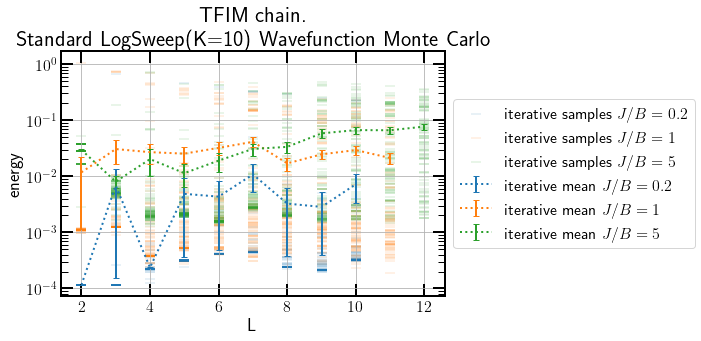

In [11]:
K=10
plt.figure(figsize = (10, 5))
plt.title(f'TFIM chain.\nStandard LogSweep(K={K}) Wavefunction Monte Carlo')

# iterative
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_avg'], 
                      d['energy_std']/np.sqrt(len(d['energy_samples'])) 
                     ) for d in iterative_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    avgs = np.array(avgs) + 1
#     plt.plot(L_l, avgs, ':', label=f'iterative $J/B={JvB}$')
    plt.errorbar(L_l, avgs, yerr=stds, fmt=':', label=f'iterative mean $J/B={JvB}$')
#     plt.fill_between(L_l, np.array(avgs)-stds, np.array(avgs)+stds, alpha=.1, 
#                      label = f'iterative $J/B={JvB}$')

# iterative
plt.gca().set_prop_cycle(None)
for JvB in [.2, 1, 5]:
    data_iterator = ((d['L'],  
                      d['energy_samples']
                     ) for d in iterative_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, samples = zip(*sorted(data_iterator))
    samples = np.array(samples) + 1
    plt.scatter(np.repeat(L_l, samples.shape[-1]), samples.flatten(), 
                s = 100, alpha = 0.1, marker = '_', label=f'iterative samples $J/B={JvB}$')
    
plt.grid(axis='y',which='minor')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.xlabel('L')
plt.ylabel('energy')

## ground space infidelity 

Text(0, 0.5, 'ground space infidelity')

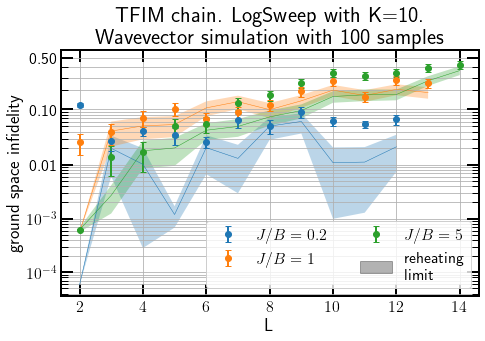

In [27]:
K=10
plt.title(f'TFIM chain. LogSweep with K={K}.\n'
          'Wavevector simulation with 100 samples')
alpha = 0.3
JvBlist = [.2, 1, 5]

# cooling
for JvB in JvBlist:
    data_iterator = ((d['L'], 
                      d['gsf_avg'], 
                      d['gsf_std']/np.sqrt(len(d['gsf_samples']))
                     ) for d in cooling_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    plt.errorbar(L_l, 1-np.array(avgs), yerr=stds, 
                 fmt='o', label=f'cooling $J/B={JvB}$')
    
# reheating
plt.gca().set_prop_cycle(None)
for JvB in JvBlist:
    data_iterator = ((d['L'],  
                      d['gsf_avg'], 
                      d['gsf_std']/np.sqrt(len(d['gsf_samples'])) 
                     ) for d in reheating_data 
                       if d['K'] == K and np.isclose(d['J']/d['B'], JvB))
    L_l, avgs, stds = zip(*sorted(data_iterator))
    
    plt.fill_between(L_l, 1-np.array(avgs)-stds, 1-np.array(avgs)+stds, 
                     alpha=alpha, label = f'reheating $J/B={JvB}$')
    
    plt.plot(L_l, 1-np.array(avgs), '-', lw=0.5)
    
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[3:] + [plt.Polygon([(0,0), (1,1)], color='black', alpha = alpha)],
           [f'$J/B = {JvB}$' for JvB in JvBlist] + ['reheating\nlimit'],
           ncol=2)

plt.yscale('logit')
plt.gca().yaxis.set_minor_formatter(plt.NullFormatter())

plt.xlabel('L')
plt.ylabel('ground space infidelity')